<a href="https://colab.research.google.com/github/Yatharth19/ML/blob/main/Calories_burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('calories.csv')

In [ ]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
df1=pd.read_csv('exercise.csv')

In [ ]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
df1.shape

(15000, 8)

In [ ]:
df.shape

(15000, 2)

In [ ]:
list_from_df=list(df['User_ID'])
list_from_df1=list(df['User_ID'])

In [ ]:
print(list_from_df==list_from_df1)

True


In [ ]:
dff=df1
dff['Calories']=df['Calories']

In [ ]:
dff.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
dff['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [ ]:
dff.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
le=LabelEncoder()
dff['Gender']=le.fit_transform(dff['Gender'])

In [ ]:
dff.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
correlation=dff.corr()

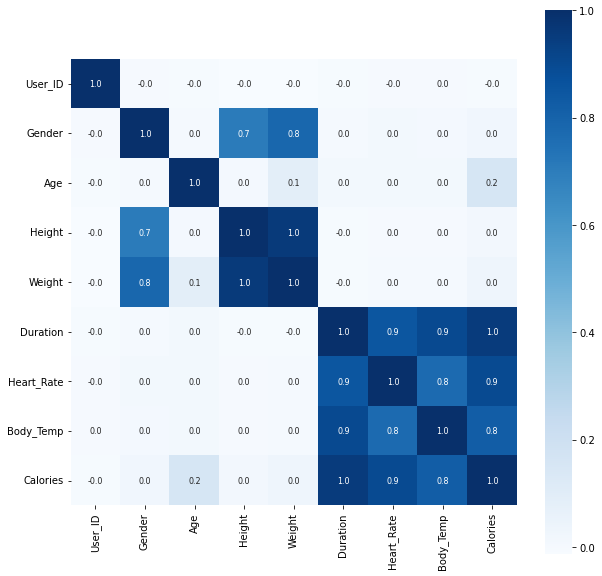

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [ ]:
X=dff[['Age','Duration','Heart_Rate','Body_Temp']]
y=dff['Calories']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
def model_performance(m,X,y):
  model=m()
  model.fit(X,y)
  return model.score(X,y)

In [ ]:
def model_evaluator(m,X,y,X_test,Y_test):
  model=m()
  model.fit(X_train,Y_train)
  return model.score(X_test,Y_test)

In [ ]:
models=[LinearRegression,XGBRegressor,RandomForestRegressor]
l=list()
for model in models:
  l.append(model_performance((model),X_train,Y_train))

[06:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(l)

[0.966923762439301, 0.9875940383895958, 0.9975811465409844]


In [ ]:
score=list()
for model in models:
  score.append(model_evaluator(model,X_train,Y_train,X_test,Y_test))

[06:52:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(score)

[0.964712912946119, 0.986043256382971, 0.9842069898564986]


In [ ]:
type(score[0])

numpy.float64